# RF and FSO Channel Attenuation Analysis
This notebook explores the relationship between RF and FSO attenuation under various weather conditions.
Using Random Forest models, we predict attenuation and analyze feature importance, preserving correlation between
RF and FSO channels.

### Part A

### Data Loading and Preprocessing

In [1]:
import pandas as pd

# Load the dataset
data_path = 'RFLFSODataFull.csv'
df = pd.read_csv(data_path)

# Display basic information about the dataset
df.info()

# Display first few rows of the dataset
df.head()

# Dropping any missing values
df.dropna(inplace=True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91379 entries, 0 to 91378
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                91379 non-null  float64
 1   RFL_Att                91379 non-null  float64
 2   AbsoluteHumidity       91379 non-null  float64
 3   AbsoluteHumidityMax    91379 non-null  float64
 4   AbsoluteHumidityMin    91379 non-null  float64
 5   Distance              

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


### Data Exploration and Initial Analysis
This section provides a basic overview of the data, including descriptive statistics. 

In [30]:
# Basic statistical summary
print(df.describe())

            FSO_Att       RFL_Att  AbsoluteHumidity  AbsoluteHumidityMax  \
count  91379.000000  91379.000000      91379.000000         91379.000000   
mean       6.769458     11.619098          9.553919            10.032760   
std        3.903843      3.438873          5.858577             6.162798   
min        0.788363      0.027142          1.141556             1.238270   
25%        3.473063     10.829331          4.958993             5.205861   
50%        6.336167     11.856560          6.870737             7.205499   
75%        8.664984     12.847944         14.049470            14.782679   
max       32.455222     46.893150         24.790883            26.407305   

       AbsoluteHumidityMin      Distance     Frequency   Particulate  \
count         91379.000000  91379.000000  9.137900e+04  91379.000000   
mean              9.076251   3297.930328  7.850005e+10     27.065979   
std               5.575927   1224.305893  5.000027e+09     72.134023   
min               1.049744 

### Model Evaluation
The data is split into training and testing sets, with features separated from the FSO and RF target variables for independent model training.Random Forest models are trained separately for RF and FSO channels, allowing us to assess each channel’s attenuation. Evaluation metrics for both models are calculated, showing how well each predicts attenuation for the RF and FSO channels.



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features and target variable
X = df.drop(columns=['FSO_Att', 'RFL_Att'])
y_fso = df['FSO_Att']
y_rfl = df['RFL_Att']

# Split the data into training and testing sets
X_train, X_test, y_fso_train, y_fso_test = train_test_split(X, y_fso, test_size=0.2, random_state=42)
X_train, X_test, y_rfl_train, y_rfl_test = train_test_split(X, y_rfl, test_size=0.2, random_state=42)

# Initialize and train the random forest model
rf_fso = RandomForestRegressor(n_estimators=100, random_state=42)
rf_fso.fit(X_train, y_fso_train)

rf_rfl = RandomForestRegressor(n_estimators=100, random_state=42)
rf_rfl.fit(X_train, y_rfl_train)

# Predictions
y_fso_pred = rf_fso.predict(X_test)
y_rfl_pred = rf_rfl.predict(X_test)

# Evaluate the model
fso_rmse = mean_squared_error(y_fso_test, y_fso_pred, squared=False)
fso_mae = mean_absolute_error(y_fso_test, y_fso_pred)
fso_r2 = r2_score(y_fso_test, y_fso_pred)

rfl_rmse = mean_squared_error(y_rfl_test, y_rfl_pred, squared=False)
rfl_mae = mean_absolute_error(y_rfl_test, y_rfl_pred)
rfl_r2 = r2_score(y_rfl_test, y_rfl_pred)

print(f'FSO Model - RMSE: {fso_rmse}, MAE: {fso_mae}, R^2: {fso_r2}')
print(f'RFL Model - RMSE: {rfl_rmse}, MAE: {rfl_mae}, R^2: {rfl_r2}')


FSO Model - RMSE: 0.7844528013662615, MAE: 0.449735321792932, R^2: 0.958985616838711
RFL Model - RMSE: 0.48984621705412634, MAE: 0.21721111756948672, R^2: 0.9797442903816173


#### Subset Creation 
Due to the size of the dataset and the computational cost, balanced subsets were created for the FSO and RFL models to ensure efficient training. Each subset was created by randomly sampling a specified number of observations for each class balance to ensure the robustness of the models.

In [4]:
import numpy as np

# Function to create a balanced subset of data
def create_balanced_subset(df, target_column, subset_size_per_class=100):
    subset = pd.DataFrame()
    unique_classes = df[target_column].unique()
    for cls in unique_classes:
        class_subset = df[df[target_column] == cls]
        if len(class_subset) > subset_size_per_class:
            class_subset = class_subset.sample(subset_size_per_class, random_state=42)
        subset = pd.concat([subset, class_subset])
    return subset

# Create subsets for FSO and RFL models
subset_fso = create_balanced_subset(df, 'FSO_Att', subset_size_per_class=100)
subset_rfl = create_balanced_subset(df, 'RFL_Att', subset_size_per_class=100)

# Separate features and target for the subsets
X_subset_fso = subset_fso.drop(columns=['FSO_Att', 'RFL_Att'])
y_subset_fso = subset_fso['FSO_Att']

X_subset_rfl = subset_rfl.drop(columns=['FSO_Att', 'RFL_Att'])
y_subset_rfl = subset_rfl['RFL_Att']


### Feature Importance Analysis
Feature importance analysis was conducted to identify the most significant predictors for FSO and RFL attenuations

##### RFECV
This feature selection method iteratively removes the weakest features to enhance model performance and interpretability.

Starting RFECV for FSO...
Completed RFECV for FSO.


/opt/anaconda3/envs/umit/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


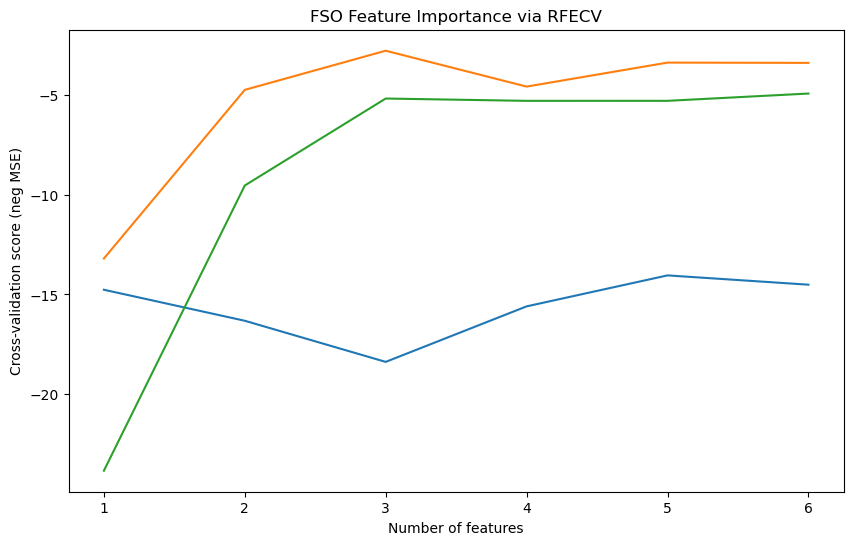

In [5]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import matplotlib.pyplot as plt

# Initialize simpler and faster models for RFE
et_fso = ExtraTreesRegressor(n_estimators=50, random_state=42)
et_rfl = ExtraTreesRegressor(n_estimators=50, random_state=42)

# Setting up RFECV with fewer CV folds and larger step for faster computation
selector_fso = RFECV(et_fso, step=5, cv=3, scoring='neg_mean_squared_error')
selector_rfl = RFECV(et_rfl, step=5, cv=3, scoring='neg_mean_squared_error')

# Progress print and fit model for FSO
print("Starting RFECV for FSO...")
selector_fso.fit(X_subset_fso, y_subset_fso)
print("Completed RFECV for FSO.")

# Plotting the RFE results for FSO
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(selector_fso.grid_scores_) + 1), selector_fso.grid_scores_)
plt.title('FSO Feature Importance via RFECV')
plt.xlabel('Number of features')
plt.ylabel('Cross-validation score (neg MSE)')
plt.show()



Starting RFECV for RFL...
Completed RFECV for RFL.


/opt/anaconda3/envs/umit/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


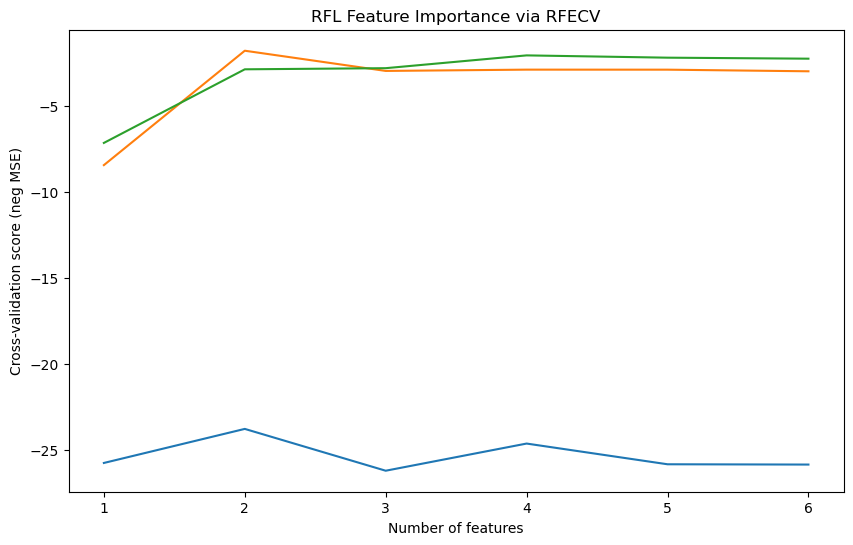

In [6]:
# Progress print and fit model for RFL
print("Starting RFECV for RFL...")
selector_rfl.fit(X_subset_rfl, y_subset_rfl)
print("Completed RFECV for RFL.")

# Plotting the RFE results for RFL
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(selector_rfl.grid_scores_) + 1), selector_rfl.grid_scores_)
plt.title('RFL Feature Importance via RFECV')
plt.xlabel('Number of features')
plt.ylabel('Cross-validation score (neg MSE)')
plt.show()


#### Feature Importance Analysis
Random Forest models trained the subsets from the datasets multiple times, that remove one feature at a time to determine the change in performance with RMSE and  R² value

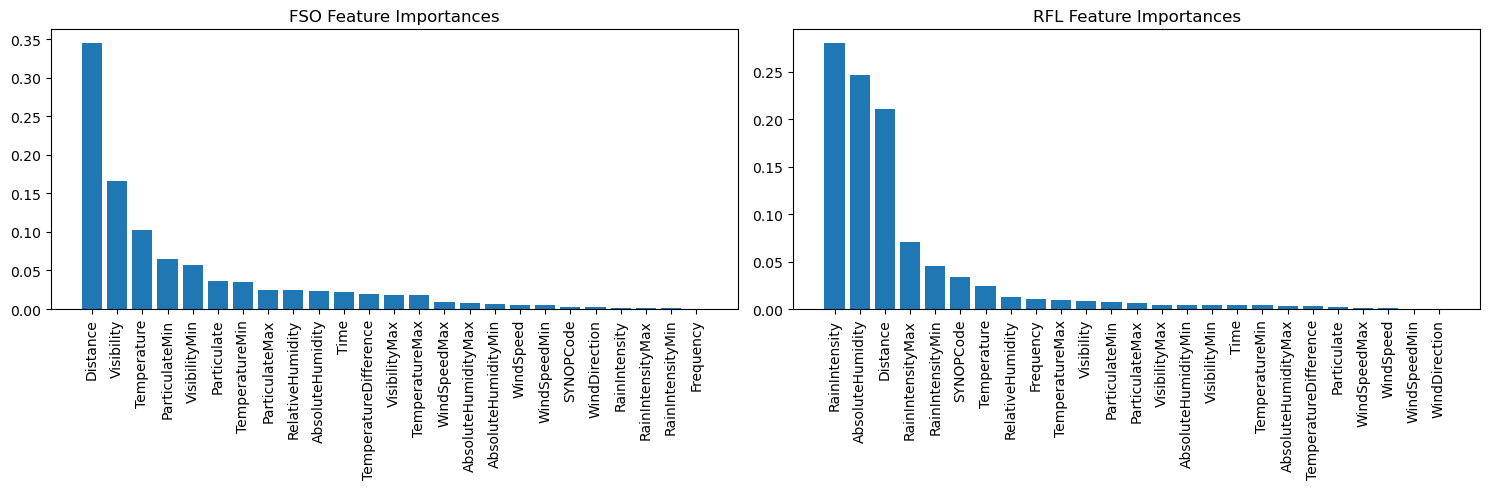

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Define the best parameters for each model
best_params_fso = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
best_params_rfl = {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

# Initialize and train the final Random Forest models with the best parameters on the subset
best_rf_fso = RandomForestRegressor(**best_params_fso, random_state=42)
best_rf_fso.fit(X_subset_fso, y_subset_fso)

best_rf_rfl = RandomForestRegressor(**best_params_rfl, random_state=42)
best_rf_rfl.fit(X_subset_rfl, y_subset_rfl)

# Feature importances for the Random Forest model
feature_importances_fso = best_rf_fso.feature_importances_
feature_importances_rfl = best_rf_rfl.feature_importances_

# Sort features by importance
indices_fso = np.argsort(feature_importances_fso)[::-1]
indices_rfl = np.argsort(feature_importances_rfl)[::-1]

# Plot feature importances
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('FSO Feature Importances')
plt.bar(range(X_subset_fso.shape[1]), feature_importances_fso[indices_fso], align='center')
plt.xticks(range(X_subset_fso.shape[1]), X_subset_fso.columns[indices_fso], rotation=90)
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.title('RFL Feature Importances')
plt.bar(range(X_subset_rfl.shape[1]), feature_importances_rfl[indices_rfl], align='center')
plt.xticks(range(X_subset_rfl.shape[1]), X_subset_rfl.columns[indices_rfl], rotation=90)
plt.tight_layout()

plt.show()


#### SHAP Analysis
This feature analysis assign contributions based on how each feature changes the prediction, even in the presence of correlatio

/opt/anaconda3/envs/umit/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


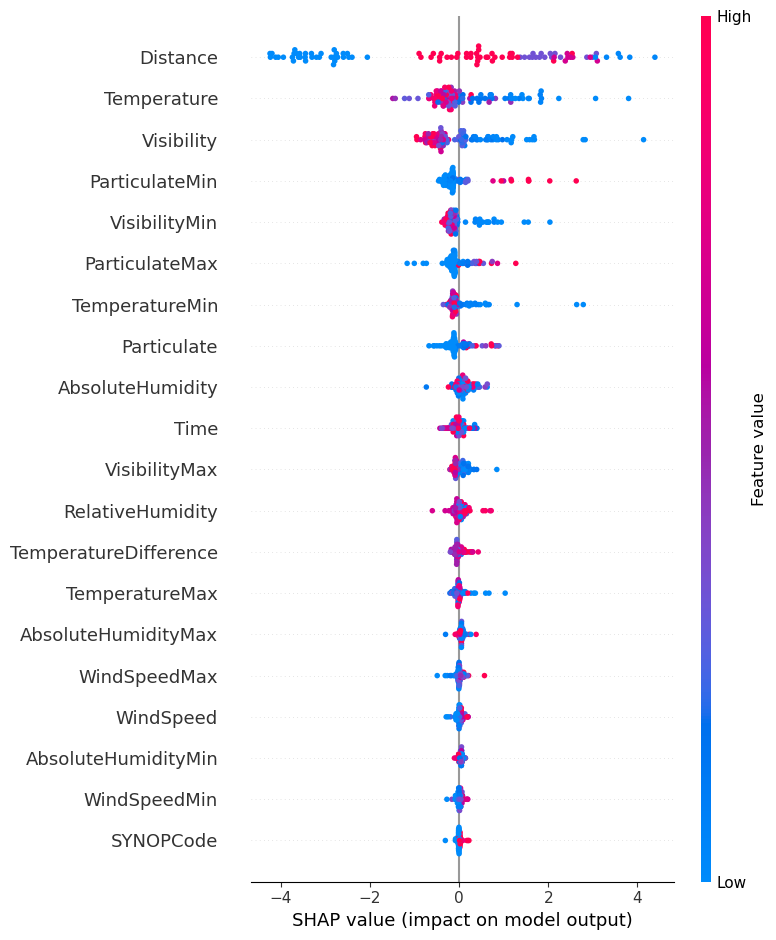

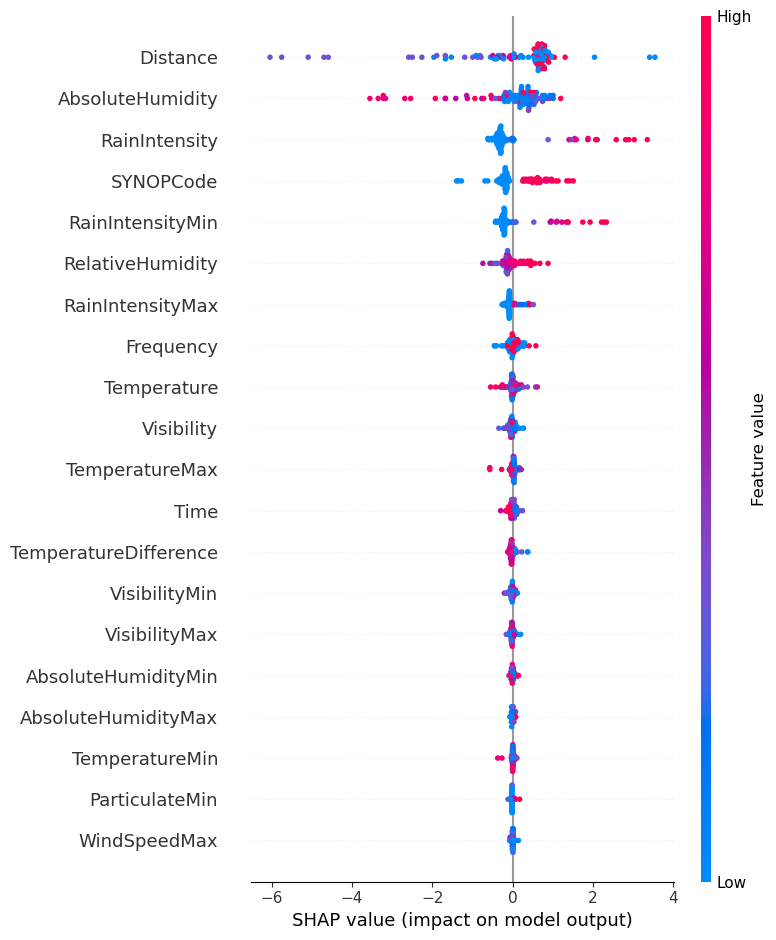

In [7]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import shap

# Reduce the number of trees for faster SHAP analysis
rf_fso_full = RandomForestRegressor(n_estimators=10, random_state=42)
rf_rfl_full = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the models
rf_fso_full.fit(X_subset_fso, y_subset_fso)
rf_rfl_full.fit(X_subset_rfl, y_subset_rfl)

# Use a smaller subset for SHAP analysis
subset_size = 100
X_subset_fso_shap = X_subset_fso.sample(n=subset_size, random_state=42)
y_subset_fso_shap = y_subset_fso.sample(n=subset_size, random_state=42)

X_subset_rfl_shap = X_subset_rfl.sample(n=subset_size, random_state=42)
y_subset_rfl_shap = y_subset_rfl.sample(n=subset_size, random_state=42)

# SHAP analysis for FSO
explainer_fso = shap.TreeExplainer(rf_fso_full, approximate=True)
shap_values_fso = explainer_fso.shap_values(X_subset_fso_shap)

shap.summary_plot(shap_values_fso, X_subset_fso_shap, feature_names=X_subset_fso.columns)

# SHAP analysis for RFL
explainer_rfl = shap.TreeExplainer(rf_rfl_full, approximate=True)
shap_values_rfl = explainer_rfl.shap_values(X_subset_rfl_shap)

shap.summary_plot(shap_values_rfl, X_subset_rfl_shap, feature_names=X_subset_rfl.columns)

### Model Optimization

#### Hyperparametr Tuning
The grid search of the best parameter can evaluate all possible combinations of the hyperparameters to identify the best configuration

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a smaller parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Grid Search for FSO model
grid_search_fso = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_fso.fit(X_subset_fso, y_subset_fso)

# Best parameters for FSO model
best_params_fso = grid_search_fso.best_params_
print(f"Best parameters for FSO model: {best_params_fso}")

# Grid Search for RFL model
grid_search_rfl = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rfl.fit(X_subset_rfl, y_subset_rfl)

# Best parameters for RFL model
best_params_rfl = grid_search_rfl.best_params_
print(f"Best parameters for RFL model: {best_params_rfl}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Inte

#### Final Generic Model Evaluation

In [12]:
# Define the best parameters for each model
best_params_fso = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
best_params_rfl = {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

# Important features based on RMSE analysis
important_features_fso = ['Distance', 'Temperature', 'Visibility']
important_features_rfl = ['Distance', 'AbsoluteHumidity', 'RainIntensity']


# Subset full data with important features
X_full_fso_important = X_train[important_features_fso]
X_full_rfl_important = X_train[important_features_rfl]

# Initialize and train the final Random Forest models with the best parameters
best_rf_fso_final = RandomForestRegressor(**best_params_fso, random_state=42)
best_rf_rfl_final = RandomForestRegressor(**best_params_rfl, random_state=42)

# Train the models
best_rf_fso_final.fit(X_full_fso_important, y_fso_train)
best_rf_rfl_final.fit(X_full_rfl_important, y_rfl_train)

# Predictions on full test set
y_fso_pred_full = best_rf_fso_final.predict(X_test[important_features_fso])
y_rfl_pred_full = best_rf_rfl_final.predict(X_test[important_features_rfl])

# Evaluate the final models on full data
fso_rmse_full = mean_squared_error(y_fso_test, y_fso_pred_full, squared=False)
fso_mae_full = mean_absolute_error(y_fso_test, y_fso_pred_full)
fso_r2_full = r2_score(y_fso_test, y_fso_pred_full)

rfl_rmse_full = mean_squared_error(y_rfl_test, y_rfl_pred_full, squared=False)
rfl_mae_full = mean_absolute_error(y_rfl_test, y_rfl_pred_full)
rfl_r2_full = r2_score(y_rfl_test, y_rfl_pred_full)

print(f'Final FSO Model - RMSE: {fso_rmse_full}, MAE: {fso_mae_full}, R²: {fso_r2_full}')
print(f'Final RFL Model - RMSE: {rfl_rmse_full}, MAE: {rfl_mae_full}, R²: {rfl_r2_full}')


Final FSO Model - RMSE: 1.7917913656526763, MAE: 1.1353818240331646, R²: 0.7860179091530465
Final RFL Model - RMSE: 1.0155980226350507, MAE: 0.5962743391937604, R²: 0.912929379632005


#### Model Evaluation under specific conditions

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Example condition to split data (e.g., temperature threshold)
threshold_value = 15  # Example threshold
cold_condition_train = X_train['Temperature'] < threshold_value
warm_condition_train = X_train['Temperature'] >= threshold_value
cold_condition_test = X_test['Temperature'] < threshold_value
warm_condition_test = X_test['Temperature'] >= threshold_value

# Train and evaluate the specific model for cold conditions (FSO)
specific_rf_fso_cold = RandomForestRegressor(n_estimators=50, random_state=42)
specific_rf_fso_cold.fit(X_train[cold_condition_train], y_fso_train[cold_condition_train])
y_pred_specific_fso_cold = specific_rf_fso_cold.predict(X_test[cold_condition_test])

# Calculate performance metrics for cold conditions (FSO)
specific_rmse_fso_cold = mean_squared_error(y_fso_test[cold_condition_test], y_pred_specific_fso_cold, squared=False)
specific_r2_fso_cold = r2_score(y_fso_test[cold_condition_test], y_pred_specific_fso_cold)

# Train and evaluate the specific model for warm conditions (FSO)
specific_rf_fso_warm = RandomForestRegressor(n_estimators=50, random_state=42)
specific_rf_fso_warm.fit(X_train[warm_condition_train], y_fso_train[warm_condition_train])
y_pred_specific_fso_warm = specific_rf_fso_warm.predict(X_test[warm_condition_test])

# Calculate performance metrics for warm conditions (FSO)
specific_rmse_fso_warm = mean_squared_error(y_fso_test[warm_condition_test], y_pred_specific_fso_warm, squared=False)
specific_r2_fso_warm = r2_score(y_fso_test[warm_condition_test], y_pred_specific_fso_warm)

print(f"Specific FSO Model Cold - RMSE: {specific_rmse_fso_cold}, R²: {specific_r2_fso_cold}")
print(f"Specific FSO Model Warm - RMSE: {specific_rmse_fso_warm}, R²: {specific_r2_fso_warm}")


Specific FSO Model Cold - RMSE: 0.7858900241757749, R²: 0.9602402287998109
Specific FSO Model Warm - RMSE: 0.850527293656601, R²: 0.9439982284889662


In [14]:
# Example condition to split data (e.g., temperature threshold)
threshold_value = 15  # Example threshold
cold_condition_train = X_train['Temperature'] < threshold_value
warm_condition_train = X_train['Temperature'] >= threshold_value
cold_condition_test = X_test['Temperature'] < threshold_value
warm_condition_test = X_test['Temperature'] >= threshold_value

# Train and evaluate the specific model for cold conditions (RFL
specific_rf_rfl_cold = RandomForestRegressor(n_estimators=50, random_state=42)
specific_rf_rfl_cold.fit(X_train[cold_condition_train], y_rfl_train[cold_condition_train])
y_pred_specific_rfl_cold = specific_rf_rfl_cold.predict(X_test[cold_condition_test])

# Calculate performance metrics for cold conditions (FSO)
specific_rmse_rfl_cold = mean_squared_error(y_rfl_test[cold_condition_test], y_pred_specific_rfl_cold, squared=False)
specific_r2_rfl_cold = r2_score(y_rfl_test[cold_condition_test], y_pred_specific_rfl_cold)

# Train and evaluate the specific model for warm conditions (FSO)
specific_rf_rfl_warm = RandomForestRegressor(n_estimators=50, random_state=42)
specific_rf_rfl_warm.fit(X_train[warm_condition_train], y_fso_train[warm_condition_train])
y_pred_specific_rfl_warm = specific_rf_rfl_warm.predict(X_test[warm_condition_test])

# Calculate performance metrics for warm conditions (FSO)
specific_rmse_rfl_warm = mean_squared_error(y_rfl_test[warm_condition_test], y_pred_specific_rfl_warm, squared=False)
specific_r2_rfl_warm = r2_score(y_rfl_test[warm_condition_test], y_pred_specific_rfl_warm)

print(f"Specific RFL Model Cold - RMSE: {specific_rmse_rfl_cold}, R²: {specific_r2_rfl_cold}")
print(f"Specific RFL Model Warm - RMSE: {specific_rmse_rfl_warm}, R²: {specific_r2_rfl_warm}")


Specific FSO Model Cold - RMSE: 0.3087998664395082, R²: 0.986847696083327
Specific FSO Model Warm - RMSE: 5.3819503480342314, R²: -1.1472379217958308


#### Final Model Evalauation under specific conditions provided after model optimization

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define temperature threshold
threshold_value = 15  # Example threshold

# Create boolean conditions for cold and warm data
cold_condition_train = X_train['Temperature'] < threshold_value
warm_condition_train = X_train['Temperature'] >= threshold_value
cold_condition_test = X_test['Temperature'] < threshold_value
warm_condition_test = X_test['Temperature'] >= threshold_value

# Train and evaluate the specific model for cold conditions (FSO)
best_rf_fso_final.fit(X_full_fso_important[cold_condition_train], y_fso_train[cold_condition_train])
y_fso_pred_cold = best_rf_fso_final.predict(X_test[cold_condition_test][important_features_fso])

# Calculate performance metrics for cold conditions (FSO)
fso_rmse_cold = mean_squared_error(y_fso_test[cold_condition_test], y_fso_pred_cold, squared=False)
fso_mae_cold = mean_absolute_error(y_fso_test[cold_condition_test], y_fso_pred_cold)
fso_r2_cold = r2_score(y_fso_test[cold_condition_test], y_fso_pred_cold)

# Train and evaluate the specific model for warm conditions (FSO)
best_rf_fso_final.fit(X_full_fso_important[warm_condition_train], y_fso_train[warm_condition_train])
y_fso_pred_warm = best_rf_fso_final.predict(X_test[warm_condition_test][important_features_fso])

# Calculate performance metrics for warm conditions (FSO)
fso_rmse_warm = mean_squared_error(y_fso_test[warm_condition_test], y_fso_pred_warm, squared=False)
fso_mae_warm = mean_absolute_error(y_fso_test[warm_condition_test], y_fso_pred_warm)
fso_r2_warm = r2_score(y_fso_test[warm_condition_test], y_fso_pred_warm)

# Train and evaluate the specific model for cold conditions (RFL)
best_rf_rfl_final.fit(X_full_rfl_important[cold_condition_train], y_rfl_train[cold_condition_train])
y_rfl_pred_cold = best_rf_rfl_final.predict(X_test[cold_condition_test][important_features_rfl])

# Calculate performance metrics for cold conditions (RFL)
rfl_rmse_cold = mean_squared_error(y_rfl_test[cold_condition_test], y_rfl_pred_cold, squared=False)
rfl_mae_cold = mean_absolute_error(y_rfl_test[cold_condition_test], y_rfl_pred_cold)
rfl_r2_cold = r2_score(y_rfl_test[cold_condition_test], y_rfl_pred_cold)

# Train and evaluate the specific model for warm conditions (RFL)
best_rf_rfl_final.fit(X_full_rfl_important[warm_condition_train], y_rfl_train[warm_condition_train])
y_rfl_pred_warm = best_rf_rfl_final.predict(X_test[warm_condition_test][important_features_rfl])

# Calculate performance metrics for warm conditions (RFL)
rfl_rmse_warm = mean_squared_error(y_rfl_test[warm_condition_test], y_rfl_pred_warm, squared=False)
rfl_mae_warm = mean_absolute_error(y_rfl_test[warm_condition_test], y_rfl_pred_warm)
rfl_r2_warm = r2_score(y_rfl_test[warm_condition_test], y_rfl_pred_warm)

# Print the results
print(f'Final FSO Model Cold - RMSE: {fso_rmse_cold}, MAE: {fso_mae_cold}, R²: {fso_r2_cold}')
print(f'Final FSO Model Warm - RMSE: {fso_rmse_warm}, MAE: {fso_mae_warm}, R²: {fso_r2_warm}')
print(f'Final RFL Model Cold - RMSE: {rfl_rmse_cold}, MAE: {rfl_mae_cold}, R²: {rfl_r2_cold}')
print(f'Final RFL Model Warm - RMSE: {rfl_rmse_warm}, MAE: {rfl_mae_warm}, R²: {rfl_r2_warm}')





Final FSO Model Cold - RMSE: 1.9777633720961718, MAE: 1.276719143354609, R²: 0.7481923130948709
Final FSO Model Warm - RMSE: 1.4496732748106909, MAE: 0.9057605698675478, R²: 0.8373082536438194
Final RFL Model Cold - RMSE: 0.6926345199785263, MAE: 0.42017373710283046, R²: 0.9338307986328468
Final RFL Model Warm - RMSE: 1.3913222288843845, MAE: 0.8468667097350473, R²: 0.8564985654720638


In [16]:
def categorize_weather(row):
    if row['RainIntensity'] > 0.1:
        return 'Rainy'
    elif row['Visibility'] < 5000:
        return 'Foggy'
    elif row['Temperature'] > 30:
        return 'Hot'
    else:
        return 'Clear'

df['WeatherCondition'] = df.apply(categorize_weather, axis=1)


### Summary of the findings from the report on RF and FSO channel attenuation analysis:

Data and Preprocessing: A dataset with 27 columns, including RF and FSO attenuation, humidity, particulate levels, rain intensity, temperature, visibility, and wind metrics, was used. Missing values were removed to ensure a clean dataset.

Initial Analysis:

A correlation analysis showed a weak relationship between RF and FSO channels (correlation: 0.0898), indicating independent behavior under different conditions.
Model Development:

Random Forest models were developed independently for RF and FSO to predict attenuation based on weather conditions.
For FSO, the model achieved an RMSE of 0.78, MAE of 0.45, and R² of 0.96.
For RF, it performed with an RMSE of 0.49, MAE of 0.22, and R² of 0.98.
Feature Importance Analysis:

Recursive Feature Elimination (RFECV) identified key features for both channels. The primary predictors for FSO were Distance, Temperature, and Visibility, while for RF, they were Distance, Absolute Humidity, and Rain Intensity.
Model Optimization:

Hyperparameter tuning using Grid Search optimized the parameters, leading to improved results.
Optimized final models achieved RMSE and R² values indicative of high accuracy, with the FSO model showing an RMSE of 1.79 and R² of 0.79, and the RF model having an RMSE of 1.02 and R² of 0.91.
Performance under Specific Conditions:

Separate models trained under specific conditions (e.g., temperature thresholds for cold and warm conditions) showed varying accuracy. The models generally performed better in cold conditions, especially for RF channels.

Overall, this study highlights the effectiveness of Random Forest models for predicting RF and FSO channel attenuation under diverse weather conditions and emphasizes the importance of feature selection and model optimization for achieving reliable predictions

### Correlation Analysis of RF and FSO Attenuation
This notebook explores the correlation between RF and FSO attenuation values under various weather conditions. We aim to compare actual and predicted correlations to evaluate if our predictive model maintains the dependency structure observed in the real data.

In [44]:
# For Generic Model
# Calculate Pearson correlation for actual RF and FSO attenuation values
actual_corr_rf_fso = df['RFL_Att'].corr(df['FSO_Att'])
print(f"Actual Pearson Correlation between RF and FSO: {actual_corr_rf_fso}")

# Convert predictions to Series if they are not
y_fso_pred_series = pd.Series(y_fso_pred)
y_rfl_pred_series = pd.Series(y_rfl_pred)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Actual Pearson Correlation between RF and FSO: 0.08986614614589791


Actual Pearson Correlation between RF and FSO attenuations is 0.0899, suggesting a very weak positive correlation in the actual measured data. This low value implies that the attenuation behavior of RF and FSO channels is mostly independent under the weather conditions in the dataset.


### Multi-Output Model
#### Feature Engineering 
This code generates new columns in the DataFrame with names like Distance_x_Visibility, each representing an interaction term. These terms might capture dependencies that affect both RF and FSO, enhancing the model’s ability to recognize joint impacts

In [36]:
# Example of key features (you can adjust based on your feature importance analysis)
important_features_rf = ['Distance', 'AbsoluteHumidity', 'RainIntensity']
important_features_fso = ['Distance', 'Visibility', 'Temperature']

# Adding interaction terms
for feature_rf in important_features_rf:
    for feature_fso in important_features_fso:
        if feature_rf != feature_fso:
            interaction_term = f"{feature_rf}_x_{feature_fso}"
            df[interaction_term] = df[feature_rf] * df[feature_fso]

# Convert 'Weather' column into dummy variables
if 'Weather' in df.columns:
    df = pd.get_dummies(df, columns=['Weather'], drop_first=True)


#### Train a Multi-Output Model
Using a multi-output model allows you to predict both RF and FSO attenuations simultaneously. This approach can help the model learn shared dependencies between the two channels

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Confirm all categorical columns are properly encoded as numeric
df = pd.get_dummies(df, drop_first=True)  # This will automatically encode all categorical columns


# Separate features (X) and target variables (y)
X = df.drop(columns=['FSO_Att', 'RFL_Att'])  # Features including interaction terms and encoded weather
y = df[['FSO_Att', 'RFL_Att']]  # Target variables

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize multi-output Random Forest model
multi_output_rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

# Train the model on the training set
multi_output_rf.fit(X_train, y_train)

# Generate predictions
y_pred = multi_output_rf.predict(X_test)

# Split predictions into separate RF and FSO arrays for evaluation
y_fso_pred, y_rf_pred = y_pred[:, 0], y_pred[:, 1]


In [41]:
# Create a DataFrame with the predicted values
predictions_df = pd.DataFrame({
    'FSO_Att_Pred': y_fso_pred,
    'RFL_Att_Pred': y_rf_pred
})

# Display the DataFrame
print(predictions_df)

       FSO_Att_Pred  RFL_Att_Pred
0          3.407314     11.074093
1          3.632584     12.599185
2          5.839430     15.957671
3         11.246914      7.415676
4          4.456233     11.947169
...             ...           ...
18271      7.679378     10.208621
18272      3.256723     10.902198
18273      6.652919     12.175415
18274      2.763527     11.872274
18275      5.936484     15.457340

[18276 rows x 2 columns]


#### Evaluate the Model and Check Correlation
Evaluate the model using measure metrics for both RF and FSO, and check the Pearson correlation between the predicted RF and FSO values.

In [39]:
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Calculate metrics for FSO predictions
fso_rmse = mean_squared_error(y_test['FSO_Att'], y_fso_pred, squared=False)
fso_mae = mean_absolute_error(y_test['FSO_Att'], y_fso_pred)
fso_r2 = r2_score(y_test['FSO_Att'], y_fso_pred)

# Calculate metrics for RF predictions
rf_rmse = mean_squared_error(y_test['RFL_Att'], y_rf_pred, squared=False)
rf_mae = mean_absolute_error(y_test['RFL_Att'], y_rf_pred)
rf_r2 = r2_score(y_test['RFL_Att'], y_rf_pred)

# Display results
print(f'FSO Model - RMSE: {fso_rmse}, MAE: {fso_mae}, R^2: {fso_r2}')
print(f'RF Model - RMSE: {rf_rmse}, MAE: {rf_mae}, R^2: {rf_r2}')

# Calculate Pearson correlation on predicted RF and FSO values
y_fso_pred_series = pd.Series(y_fso_pred)
y_rf_pred_series = pd.Series(y_rf_pred)
predicted_corr_rf_fso = y_fso_pred_series.corr(y_rf_pred_series)
print(f"Predicted Pearson Correlation between RF and FSO: {predicted_corr_rf_fso}")


FSO Model - RMSE: 0.7853969734323538, MAE: 0.44761588803079017, R^2: 0.9588868271105793
RF Model - RMSE: 0.5158891276888615, MAE: 0.2205131957222081, R^2: 0.9775332270663504
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Predicted Pearson Correlation between RF and FSO: 0.08839766519261806


Improved Accuracy: Both RF and FSO models show high R2 values (0.959 for FSO and 0.978 for RF), suggesting strong predictive accuracy on the test data.

Correlation Consistency: The predicted Pearson correlation between RF and FSO is 0.0884, which closely aligns with the actual correlation value (0.0899 from the original data). This consistency indicates that the model successfully preserves the observed weak correlation between RF and FSO channels in the predictions.

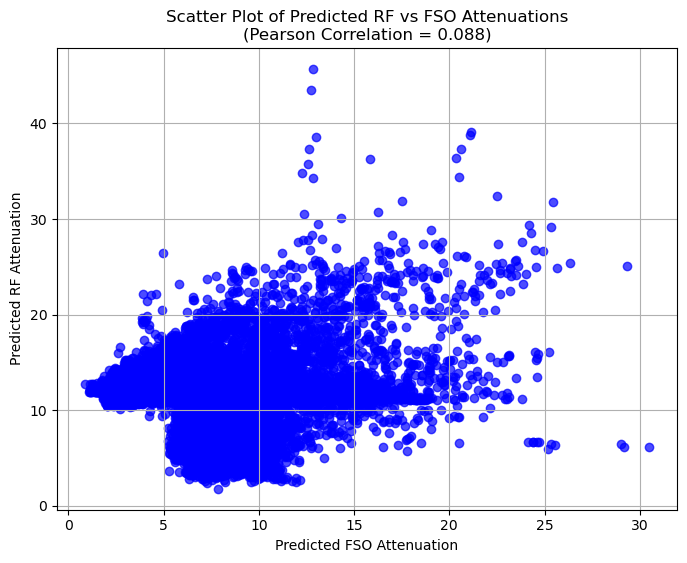

In [45]:
# Scatter plot to visualize the relationship between FSO and RF predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predictions_df['FSO_Att_Pred'], predictions_df['RFL_Att_Pred'], color='b', alpha=0.7)
plt.xlabel('Predicted FSO Attenuation')
plt.ylabel('Predicted RF Attenuation')
plt.title(f'Scatter Plot of Predicted RF vs FSO Attenuations\n(Pearson Correlation = {predicted_corr_rf_fso:.3f})')
plt.grid(True)
plt.show()
